<a href="https://colab.research.google.com/github/KimJisanER/LAIDD/blob/main/QSAR_hiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anti HIV Activity Prediction Model

## Goal of the project
- Build classification models to predict Anti HIV activity


## 1. Download Libraries

In [1]:
!curl -L bit.ly/rdkit-colab | tar xz -C /
!pip install deepchem

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0   1680      0 --:--:-- --:--:-- --:--:--  1680
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 29.6M  100 29.6M    0     0  11.0M      0  0:00:02  0:00:02 --:--:-- 13.7M
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 8.4 MB/s 
     |████████████████████████████████| 36.8 MB 27 kB/s 


### 1-2. RDKit Library
- Library related to cheminfomatics  
reference: https://www.rdkit.org/docs/GettingStartedInPython.html

In [2]:
from rdkit import Chem
m = Chem.MolFromSmiles('Cc1ccccc1')             # SMILES code를 읽고 컴퓨터가 이해할 수 있는 형식으로 변환
from rdkit.Chem import QED                      # QED라는 분자의 특성을 계산
qed = QED.qed(m)
print(qed)

0.45880627965754545


## 2. Data Processing

### 2-1. CSV 파일로부터 데이터 추출 
- CSV 파일을 읽고 Pandas DataFrame을 이용하여 SMILES code와 HIV activity feature를 추출 
- Pandas DataFrame 참고 자료 (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
HIV_dataframe = pd.read_csv('/content/drive/MyDrive/HIV.csv')
HIV_dataframe

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41908,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41909,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41910,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41911,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


In [7]:
smiles = HIV_dataframe["smiles"]
activity = HIV_dataframe["HIV_active"]
print(smiles)
print(activity)

0        CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...
1        C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...
2                         CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21
3          Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1
4                                   O=S(=O)(O)CCS(=O)(=O)O
                               ...                        
41908    CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...
41909    Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...
41910    Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...
41911    Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...
41912    CCCCCC=C(c1cc(Cl)c(OC)c(-c2nc(C)no2)c1)c1cc(Cl...
Name: smiles, Length: 41913, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
41908    0
41909    0
41910    0
41911    0
41912    0
Name: HIV_active, Length: 41913, dtype: int64


### 2-2. Ligand Featurization
- SMILES 형태로 나타낸 분자를 읽어서 딥러닝 모델에 적합한 형태로 Featurization
- Ligand Featurization method 중 fingerprint를 이용하여 featurization. 


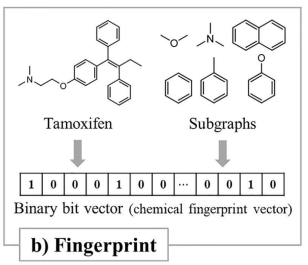

In [8]:
import numpy as np
from rdkit.Chem import AllChem
from rdkit import Chem

X = []
for i in smiles:
    mol = Chem.MolFromSmiles(i)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=1024)
    fp = np.array(fp)
    X.append(fp)
    #print(i, fp)

### 2-3. 데이터셋 나누기
- 예측 모델을 학습하기 위한 데이터와 모델을 성능을 평가하기 위한 데이터로 나눔

In [9]:
# Split Data
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, activity, test_size=0.2, random_state=23)

## 3. Build Prediction Model
### 3-1. Build Random Forest Model

- 지난 시간에 배웠던 Random Forest Model을 통하여 HIV active한 compound인지 predict 하는 model 만들기

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_Train, y_Train)

RandomForestClassifier()

- ROC value를 이용하여 Random Forest Model 성능 평가
- ROC value 관련 설명 (https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ko)

In [11]:
y_pred = rf_model.predict_proba(X_Test)[:,1]
roc = roc_auc_score(y_Test, y_pred)
print("ROC: ", roc)
accuracy = accuracy_score(y_Test, rf_model.predict(X_Test))
print("Accuracy: ", accuracy)

ROC:  0.8154588156738547
Accuracy:  0.9675533818442085


### 3-2. DeepChem으로 Random Forest 모델을 wrapping 하여 학습

In [12]:
import deepchem as dc
dc_model = RandomForestClassifier(n_estimators=100)
dc_model = dc.models.SklearnModel(dc_model)

Train_Dataset = dc.data.NumpyDataset(X=X_Train, y=y_Train)
Test_Dataset = dc.data.NumpyDataset(X=X_Test, y=y_Test)
dc_model.fit(Train_Dataset)

# Define Scoring Metric
score_metric = dc.metrics.Metric(roc_auc_score)
#Test_Dataset = dc.data.NumpyDataset(X=X_Test, y=y_Test)
roc_score = dc_model.evaluate(Test_Dataset, score_metric)
print(roc_score)

{'roc_auc_score': 0.8166630730220851}


###3-3. Tensorflow를 이용하여 Deep Learning Model 만들기
- Molecule의 ECFP로부터 HIV activity를 예측하는 Classification Model 만들기
- Fully Connected Neural Network (FCNN) 모델 만들기
- Classification model은 CrossEntropy 계열의 함수를 Loss function으로 사용
- Adam Optimizer를 통하여 Model의 parameter를 Optimize
- Model의 정확도를 모니터링하면서 모델의 학습이 제대로 이루어지는지 확인

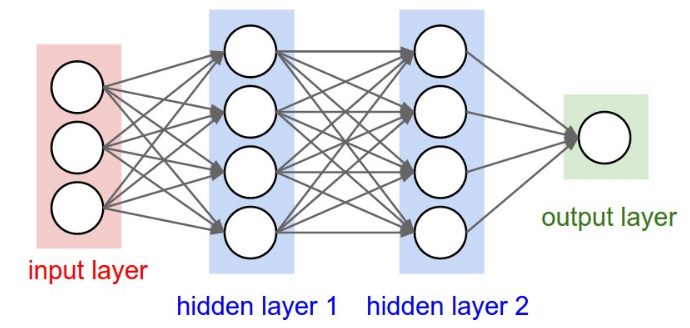

In [13]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 값들을 tensor로 변환
X_Train, X_Test, y_Train, y_Test = train_test_split(X, activity, test_size=0.2, random_state=23)
X_Train = tf.convert_to_tensor(X_Train, dtype=tf.float32)
y_Train = tf.convert_to_tensor(y_Train)
X_Test = tf.convert_to_tensor(X_Test, dtype=tf.float32)
y_Test = tf.convert_to_tensor(y_Test)

print(X_Train.shape, y_Train.shape)

# Deep Learning 모델 정의
dl_model = Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# 모델의 Optimization 방법 정의
dl_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습 진행
dl_model.fit(X_Train, y_Train, epochs=10, batch_size=32)
dl_model.summary()

(33530, 1024) (33530,)
Epoch 1/10
1048/1048 [==============================] - 6s 2ms/step - loss: 0.1380 - accuracy: 0.9669
Epoch 2/10
1048/1048 [==============================] - 3s 3ms/step - loss: 0.1026 - accuracy: 0.9726
Epoch 3/10
1048/1048 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9762
Epoch 4/10
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0620 - accuracy: 0.9804
Epoch 5/10
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0463 - accuracy: 0.9848
Epoch 6/10
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0341 - accuracy: 0.9884
Epoch 7/10
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0271 - accuracy: 0.9902
Epoch 8/10
1048/1048 [==============================] - 3s 3ms/step - loss: 0.0240 - accuracy: 0.9918
Epoch 9/10
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0202 - accuracy: 0.9927
Epoch 10/10
1048/1048 [==============================] - 2s

- Test set을 통하여 딥러닝 모델 성능 평가하기

In [14]:
#roc_auc_score on test set
from sklearn.metrics import roc_auc_score, accuracy_score
y_predict = dl_model.predict(X_Test)
print("FCNN: ", roc_auc_score(y_Test, y_predict[:,1]))

FCNN:  0.8224952104059583


### 5-4. DeepChem으로 wrapping하여 딥러닝 모델 학습

In [15]:
#DeepChem model
import deepchem as dc

Train_Dataset = dc.data.NumpyDataset(X=X_Train, y=y_Train)
Test_Dataset = dc.data.NumpyDataset(X=X_Test, y=y_Test)
score_metric = dc.metrics.Metric(roc_auc_score)

dc_model2 = dc.models.MultitaskClassifier(
    n_tasks = 1,
    n_features = 1024,
    layer_sizes = [128],
    dropouts = [.2],
    learning_rate = 0.001,
    batch_size = 32)

dc_model2.fit(Train_Dataset)
dc_scores = dc_model2.evaluate(Test_Dataset, [score_metric])
print(dc_scores)

{'roc_auc_score': 0.8248681750699988}
